In [1]:
import pandas as pd

# Load data
df = pd.read_csv('../data/raw/amazon_reviews.csv')

# Keep only what we need
df = df[['Score', 'Text']].dropna()

# Map score to sentiment
def label_sentiment(score):
    if score >= 4:
        return 'positive'
    elif score == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['Score'].apply(label_sentiment)

df.head()


,Score,Text,sentiment
0,5,I have bought several of the Vitality canned d...,positive
1,1,Product arrived labeled as Jumbo Salted Peanut...,negative
2,4,This is a confection that has been around a fe...,positive
3,2,If you are looking for the secret ingredient i...,negative
4,5,Great taffy at a great price. There was a wid...,positive


In [6]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Simple cleaner
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [w for w in words if w not in stop_words]
    return ' '.join(words)

df['clean_text'] = df['Text'].apply(clean_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bhuva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


done


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Vectorize text
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.74      0.67      0.70     16407
     neutral       0.52      0.18      0.27      8528
    positive       0.90      0.97      0.93     88756

    accuracy                           0.87    113691
   macro avg       0.72      0.61      0.64    113691
weighted avg       0.85      0.87      0.85    113691



In [8]:
# Count how many reviews per sentiment
sentiment_summary = df['sentiment'].value_counts().reset_index()
sentiment_summary.columns = ['sentiment', 'count']

# Save to CSV for dashboard
sentiment_summary.to_csv('../data/processed/sentiment_summary.csv', index=False)


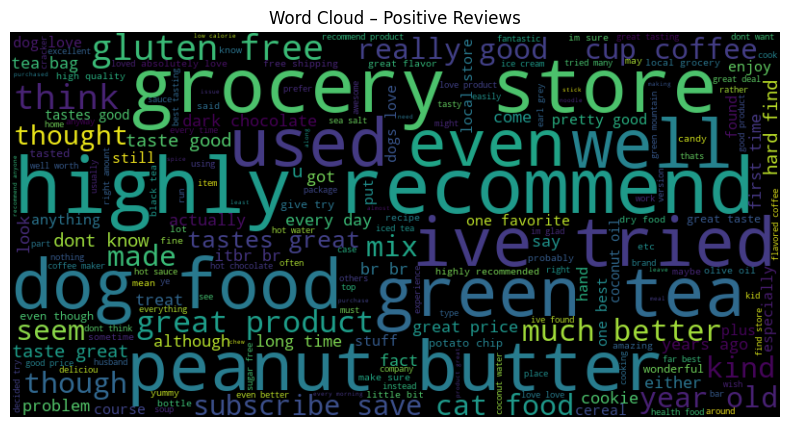

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

positive_words = ' '.join(df[df['sentiment'] == 'positive']['clean_text'].tolist())

wordcloud = WordCloud(width=800, height=400).generate(positive_words)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud – Positive Reviews")
plt.show()
